# Neural Network Classification with MNIST (Digits)

## Import Liabraries

In [11]:
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## Load MNIST dataset

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Preprocessing wrapped in a function

In [13]:
def preprocess_data(x, y, num_classes=10):
    x = x.astype("float32") / 255.0
    y = keras.utils.to_categorical(y, num_classes)
    return x, y

x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

## Baseline Model with ReLU + Adam + Softmax

In [14]:
def create_ffnn(activation="relu", optimizer="adam", hidden_layers=2):
    inputs = keras.Input(shape=(28, 28))
    x = layers.Flatten()(inputs)

    # Hidden layers dynamically created
    layer_units = [128] if hidden_layers == 1 else [128, 64]
    for u in layer_units:
        x = layers.Dense(u, activation=activation)(x)

    outputs = layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

## Train a baseline model with relu + adam + 2 hidden layers

In [15]:
baseline_model = create_ffnn()
baseline_model.summary()
history = baseline_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
test_loss, test_acc = baseline_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9277 - loss: 0.2497 - val_accuracy: 0.9667 - val_loss: 0.1100
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9680 - loss: 0.1051 - val_accuracy: 0.9673 - val_loss: 0.1030
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9774 - loss: 0.0739 - val_accuracy: 0.9758 - val_loss: 0.0820
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9820 - loss: 0.0572 - val_accuracy: 0.9765 - val_loss: 0.0808
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9760 - val_loss: 0.0906
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9728 - loss: 0.0928
Test Accuracy: 0.9728


## Compare sigmoid vs relu

In [4]:
#sigmoid 
sigmoid_model = create_ffnn(activation="sigmoid", optimizer="adam")
sigmoid_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
_, sigmoid_acc = sigmoid_model.evaluate(x_test, y_test)

# relu
relu_model = create_ffnn(activation="relu", optimizer="adam")
relu_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
_, relu_acc = relu_model.evaluate(x_test, y_test)

print(f"ReLU Accuracy: {relu_acc:.4f}")
print(f"Sigmoid Accuracy: {sigmoid_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9714 - loss: 0.0927
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9778 - loss: 0.0809
ReLU Accuracy: 0.9778
Sigmoid Accuracy: 0.9714


## Softmax vs Other Output Activations

In [16]:
def create_bad_output_model():
    inputs = keras.Input(shape=(28, 28))
    x = layers.Flatten()(inputs)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(10, activation="sigmoid")(x)  # not ideal
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

bad_output_model = create_bad_output_model()
bad_output_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
_, bad_acc = bad_output_model.evaluate(x_test, y_test)

print(f"Softmax Accuracy (ReLU): {relu_acc:.4f}")
print(f"Sigmoid Output Accuracy: {bad_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9751 - loss: 0.0810
Softmax Accuracy (ReLU): 0.9778
Sigmoid Output Accuracy: 0.9751


## Hidden Layers

In [17]:
# 1 hidden layer
model_1hl = create_ffnn(hidden_layers=1)
model_1hl.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
_, acc_1hl = model_1hl.evaluate(x_test, y_test)

print(f"1 Hidden Layer Accuracy: {acc_1hl:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9785 - loss: 0.0773
1 Hidden Layer Accuracy: 0.9785


In [18]:
# 2 hidden layers
model_2hl = create_ffnn(hidden_layers=2)
model_2hl.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
_, acc_2hl = model_2hl.evaluate(x_test, y_test)

print(f"2 Hidden Layers Accuracy: {acc_2hl:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9759 - loss: 0.0820
2 Hidden Layers Accuracy: 0.9759


## Optimizer Comparison 

In [7]:
#Comparison between adam, sgd, and rmsprop
optimizers = ["adam", "sgd", "rmsprop"]
results = {}

for opt in optimizers:
    print(f"\nTraining with optimizer: {opt}")
    model = create_ffnn(activation="relu", optimizer=opt)
    model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
    _, acc = model.evaluate(x_test, y_test)
    results[opt] = acc

for opt, acc in results.items():
    print(f"{opt.upper()} Test Accuracy: {acc:.4f}")



Training with optimizer: adam
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9758 - loss: 0.0805

Training with optimizer: sgd
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9495 - loss: 0.1742

Training with optimizer: rmsprop
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9778 - loss: 0.0908
ADAM Test Accuracy: 0.9758
SGD Test Accuracy: 0.9495
RMSPROP Test Accuracy: 0.9778


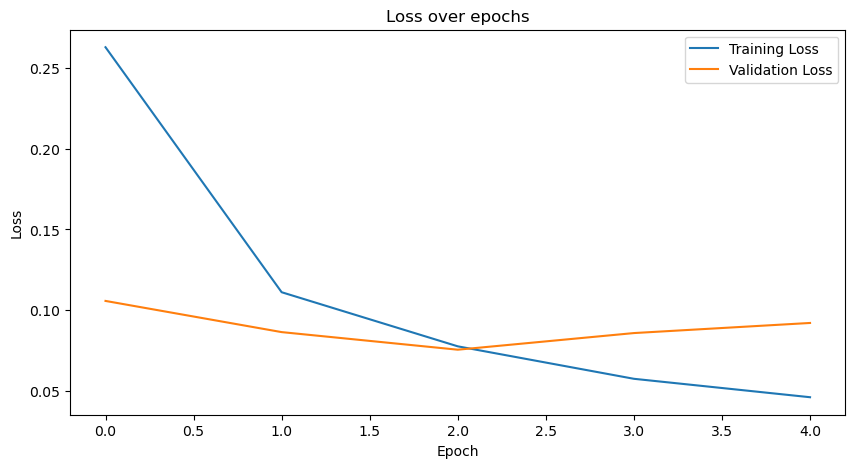

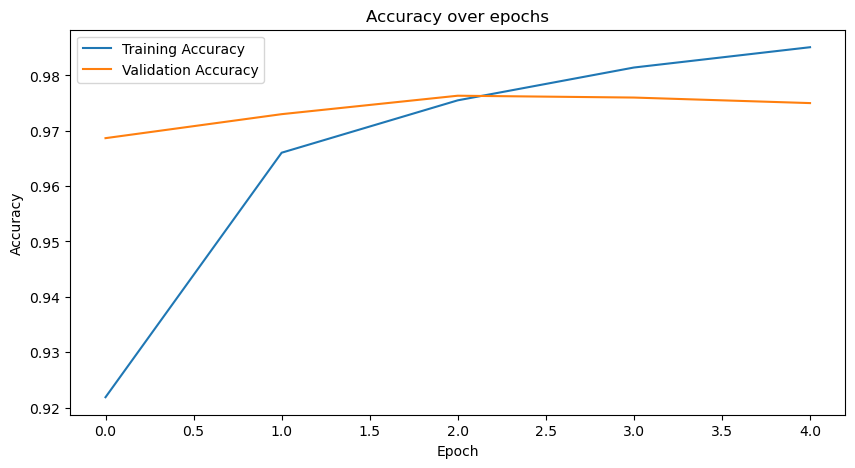

In [10]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()